In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
    # Говорим Jupeter Notebook, чтобы весь графический вывод был в браузере, а не в отдельном окне
%matplotlib inline
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Для расчёта значений метрик и выбора моделей

# 0) Описание задачи
Нашей задачей будет исследовать набор данных, состоящий из фильмов и сериалов, вышедших на Нетфликс.  
Будет выполнена визуализация данных, вычислены основные характеристики.  
Будет произведена подготовка данных к формированию обучающей и тестовой выборки.  
На основе обучающей и тестовой выборки будет исследовано, как при наличии других признаков можно определить  
значение кассовых сборов, больших или меньших определённого уровня, у фильмов и сериалов.

# 1) Считываем данные

In [2]:
url = "https://raw.githubusercontent.com/zaitcev-andrey/ML_and_DA/homework1/netflix-rotten-tomatoes-metacritic-imdb.csv"
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(15480, 29)

# 2) Визуализируем данные и вычисляем основные характеристики
Нашей задачей будет исследовать набор данных, состоящий из фильмов и сериалов, вышедших на Нетфликс.
Будет выполнена визуализация данных, вычислены основные характеристики.
Данные разобьются на обучающую и тестовую выборку.
Также будет запущен классификатор ближайших соседей.

In [4]:
data_raw

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,K-POP Extreme Survival,NaN,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/80031595,NaN,Seung Yeon decides to chase her dream of becom...,NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15476,DreamWorks Shreks Swamp Stories,NaN,"Animal Tales,Family Comedies,Family Adventures...",NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70242630,NaN,"Shrek celebrates Halloween, Puss in Boots is c...",NaN,https://occ-0-2851-38.1.nflxso.net/dnm/api/v6/...,NaN,NaN,NaN
15477,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,...,2015-04-14,NaN,https://www.netflix.com/watch/70259784,NaN,Madagascar goes wild with holiday spirit in th...,71.0,https://occ-0-2773-2774.1.nflxso.net/dnm/api/v...,NaN,NaN,NaN
15478,DreamWorks Holiday Classics,"Animation, Comedy, Family","TV Comedies,Kids TV,TV Cartoons,TV Programmes,...",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,...,2015-04-14,Fox,https://www.netflix.com/watch/70221348,NaN,Join your DreamWorks friends for these four ho...,82.0,https://occ-0-2851-38.1.nflxso

In [5]:
data_raw["Boxoffice"]

0        $2,122,065
1           $70,632
2           $16,263
3               NaN
4               NaN
            ...    
15475           NaN
15476           NaN
15477           NaN
15478           NaN
15479           NaN
Name: Boxoffice, Length: 15480, dtype: object

In [6]:
# уберём запятые и знаки доллара для того, чтобы функция describe() ниже смогла обработать этот столбец, так как она работает
# с числовыми данными
data_raw["Boxoffice"] = data_raw["Boxoffice"].apply(lambda v: float(str(v).replace(",", "").replace("$", "")))
data_raw["binary_boxoffice"] = np.where(data_raw["Boxoffice"] >= 1000000, 1, 0) # заменим 1 все суммы, которые >= 1000000, а 0 все остальные

In [7]:
data_raw["binary_boxoffice"]

0        1
1        0
2        0
3        0
4        0
        ..
15475    0
15476    0
15477    0
15478    0
15479    0
Name: binary_boxoffice, Length: 15480, dtype: int32

In [8]:
# избавляемся от ненужных признаков
data_raw.drop(['Netflix Link', 'IMDb Link', 'Summary', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site'], axis=1, inplace = True)

In [9]:
data_raw.head(8)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,IMDb Votes,binary_boxoffice
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,98.0,82.0,74.0,57.0,2122065.0,12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",205926.0,1
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,79.0,69.0,1.0,NaN,70632.0,08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",2838.0,0
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,NaN,46.0,NaN,NaN,16263.0,28 Aug 2020,2021-03-04,NaN,1720.0,0
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,01 Oct 2016,2021-03-04,NaN,1147.0,0
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,NaN,NaN,NaN,4.0,NaN,22 Sep 2011,2021-03-04,NaN,63.0,0
5,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...",...,NaN,NaN,NaN,NaN,NaN,03 Dec 2020,2021-03-03,NaN,131.0,0
6,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,NaN,NaN,2.0,4.0,NaN,14 Jun 2011,2021-03-03,NaN,47.0,0
7,Instynkt,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Polish,Series,6.9,Poland,< 30 minutes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,03 Mar 2011,2021-03-03,NaN,107.0,0


In [10]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13545 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

Признаки:  
Title - Название фильма или сериала  
Genre - Жанр  
Tags - Частые теги по жанрам  
Languages - Языки  
Series or Movie - Сериалы или фильмы  
Hidden Gem Score - Низкое количество отзывов и высокий рейтинг  
Country Availability - Доступность в стране   
Runtime - Длительность по времени фильма или серии  
Director - Режисёр  
Writer - Сценарист  
Actors - Актеры, появляющиеся в фильмах или сериалах  
View Rating - Система оценки фильмов Ассоциации кинематографистов  
IMDb Score - Оценка от IMDb  
Rotten Tomatoes Score - Оценка от Rotten Tomatoes  
Metacritic Score - Оценка от Metacritic  
Awards Received - Количество полученных наград (Оскар, Золотой глобус и др.)  
Awards Nominated For - Номинация в получении награды (Оскара, Золотого глобуса и др.)  
Boxoffice - Кассовые сборы  
Release Date - Дата выхода фильма или сериала  
Netflix Release Date - Дата выхода фильма или сериала на Нетфликс  
Production House - Кампании производители фильмов или сериалов  
IMDb Votes - Голоса от IMDb  
binary_boxoffice - бинарные кассовые сборы (1, если сборы больше >= 1000000, и 0, если <)

In [11]:
# Преобразуем следующие типы к категорильным
data_raw['Series or Movie'] = data_raw['Series or Movie'].astype('category')
data_raw['Runtime'] = data_raw['Runtime'].astype('category')

In [12]:
data_raw['Series or Movie'].dtype

CategoricalDtype(categories=['Movie', 'Series'], ordered=False)

In [13]:
data_raw['Runtime'].dtype

CategoricalDtype(categories=['1-2 hour', '30-60 mins', '< 30 minutes', '> 2 hrs'], ordered=False)

In [14]:
# генерируем описательную статистику, она обобщает центральную тенденцию, дисперсию и форму распределения набора данных, исключая Nan значения
data_raw.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,binary_boxoffice
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000,7661.000000,4.007000e+03,1.337900e+04,15480.000000
mean,5.937551,6.496054,59.523034,56.813653,8.764444,13.983161,4.568229e+07,4.272841e+04,0.191796
std,2.250202,1.146910,26.999173,17.582545,18.311171,29.821052,7.097634e+07,1.257012e+05,0.393726
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,7.200000e+01,5.000000e+00,0.000000
25%,3.800000,5.800000,38.000000,44.000000,1.000000,2.000000,7.816345e+05,4.035000e+02,0.000000
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,2.322000e+03,0.000000
75%,7.900000,7.300000,83.000000,70.000000,8.000000,12.000000,5.969536e+07,2.089050e+04,0.000000
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2.354197e+06,1.000000


In [15]:
# создаём корреляционную матрицу
corr_matrix = data_raw.corr()

In [16]:
corr_matrix

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,binary_boxoffice
Hidden Gem Score,1.000000,0.120373,0.397905,0.521470,-0.112787,-0.159500,-0.211815,-0.359540,-0.662534
IMDb Score,0.120373,1.000000,0.710922,0.717715,0.291142,0.289843,0.138257,0.229760,0.041875
Rotten Tomatoes Score,0.397905,0.710922,1.000000,0.903345,0.301380,0.309572,0.053706,0.181762,-0.055039
Metacritic Score,0.521470,0.717715,0.903345,1.000000,0.431420,0.449726,0.061548,0.261384,-0.057512
Awards Received,-0.112787,0.291142,0.301380,0.431420,1.000000,0.817262,0.193976,0.469818,0.193552
Awards Nominated For,-0.159500,0.289843,0.309572,0.449726,0.817262,1.000000,0.284885,0.497690,0.226301
Boxoffice,-0.211815,0.138257,0.053706,0.061548,0.193976,0.284885,1.000000,0.630301,0.378817
IMDb Votes,-0.359540,0.229760,0.181762,0.261384,0.469818,0.497690,0.630301,1.000000,0.502759
binary_boxoffice,-0.662534,0.041875,-0.055039,-0.057512,0.193552,0.226301,0.378817,0.502759,1.000000


No handles with labels found to put in legend.


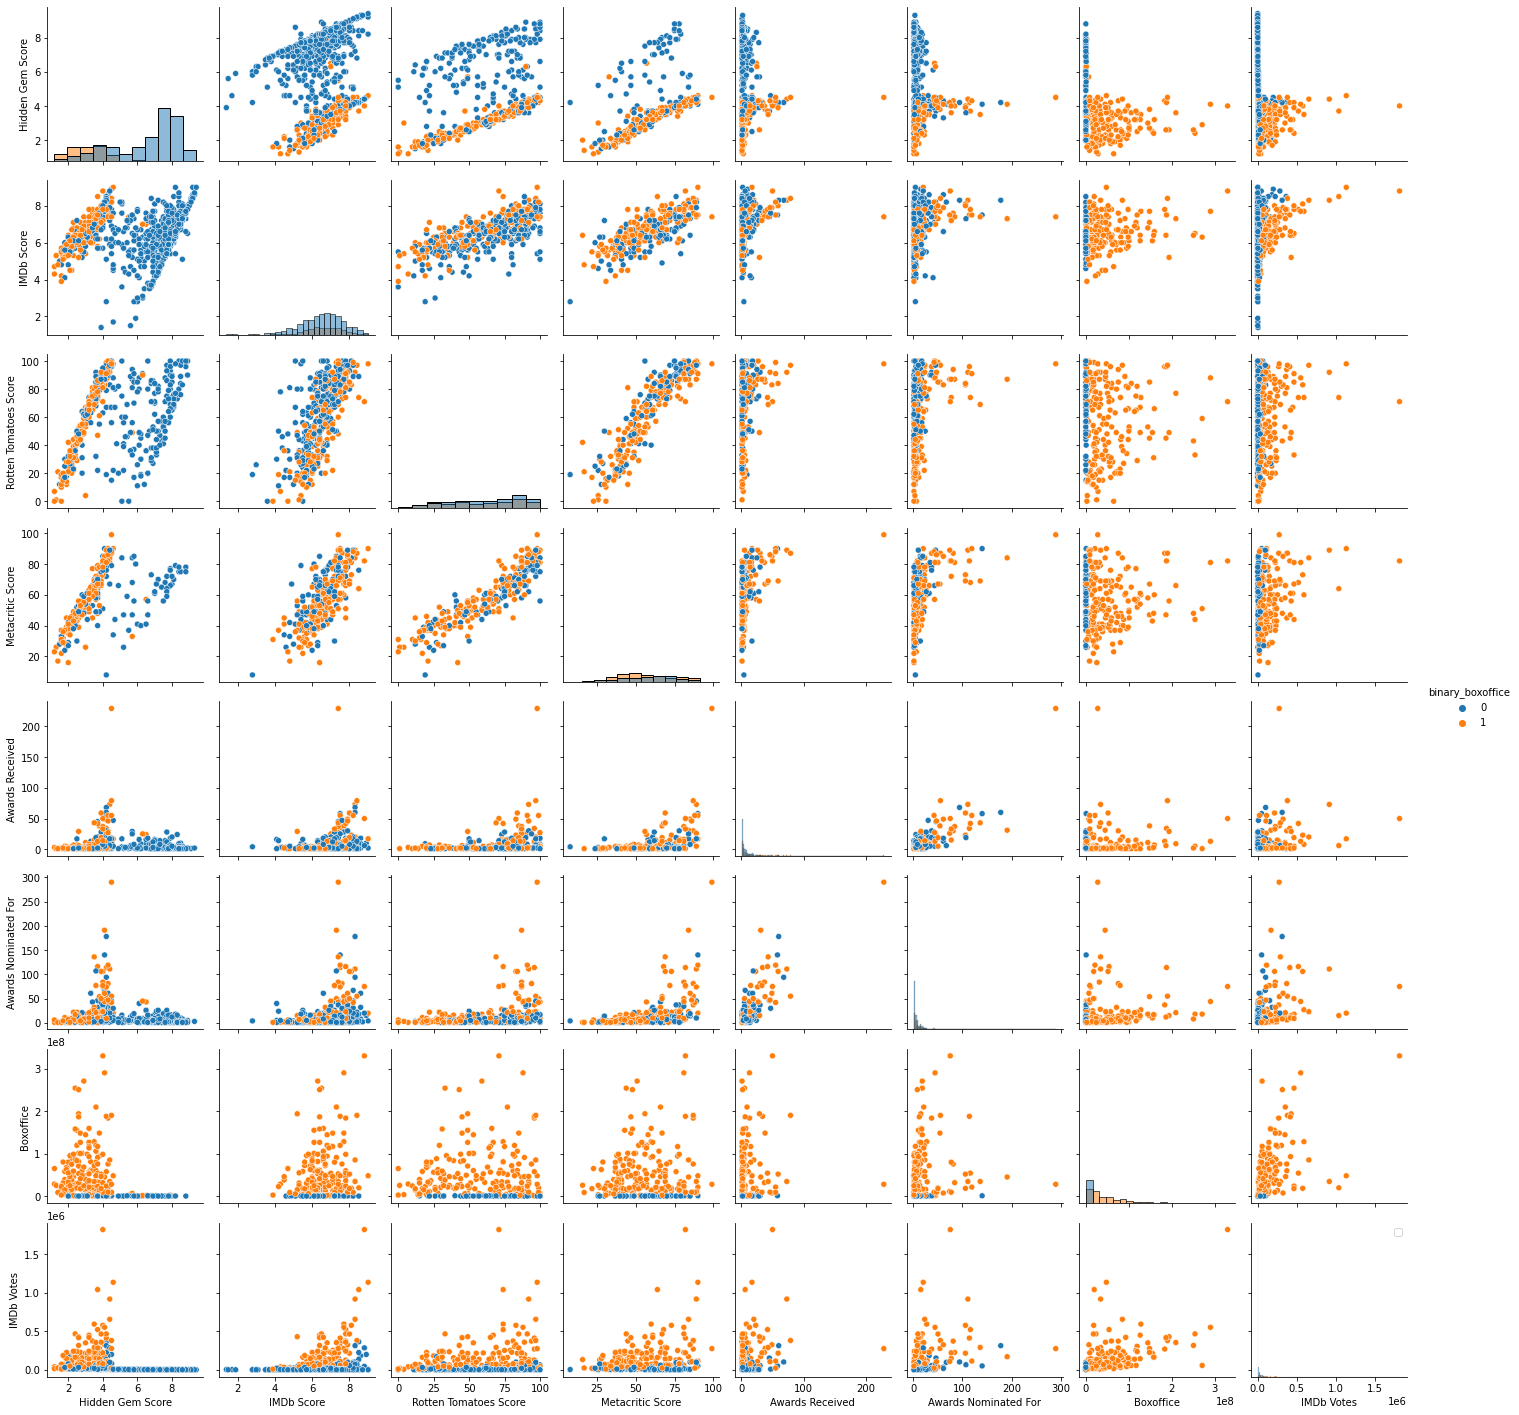

In [17]:
# Построим все возможные диаграммы рассеивания для каждой пары переменных:
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
# binary_boxoffice = 1, когда сборы >= 1000000, и 0, если сборы < 1000000
sns.pairplot(data_raw.iloc[random_subset], hue='binary_boxoffice', diag_kind='hist')
plt.legend()
pass

# 3) Обрабатываем пропущенные значения
Под пропущенными значениями в таблице понимаются значения np.nan

In [18]:
# Эта функция заменит в таблице значения с Nan на True, а все остальные значения на False
data_raw.isna()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,IMDb Votes,binary_boxoffice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,True,...,True,True,False,True,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,False,True,False,True,False,True,False,False,True,True,...,True,True,True,True,True,True,False,True,True,False
15476,False,True,False,True,False,True,False,False,True,True,...,True,True,True,True,True,True,False,True,True,False
15477,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,True,False,False
15478,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,False,False


In [19]:
# Покажем сколько пропусков есть в каждом признаке(столбце)
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                2101
binary_boxoffice             0
dtype: int64

In [20]:
# Заполним медианами пропущенные значения в столбцах (поэтому axis = 0), соответствующих числовым признакам
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

In [21]:
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score             0
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                   0
Rotten Tomatoes Score        0
Metacritic Score             0
Awards Received              0
Awards Nominated For         0
Boxoffice                    0
Release Date              2107
Netflix Release Date         0
Production House         10331
IMDb Votes                   0
binary_boxoffice             0
dtype: int64

In [22]:
# Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:
data_raw['Genre'].fillna(data_raw['Genre'].mode().iloc[0], inplace=True)
data_raw['Tags'].fillna(data_raw['Tags'].mode().iloc[0], inplace=True)
data_raw['Languages'].fillna(data_raw['Languages'].mode().iloc[0], inplace=True)
data_raw['Country Availability'].fillna(data_raw['Country Availability'].mode().iloc[0], inplace=True)
data_raw['Runtime'].fillna(data_raw['Runtime'].mode().iloc[0], inplace=True)
data_raw['Director'].fillna(data_raw['Director'].mode().iloc[0], inplace=True)
data_raw['Writer'].fillna(data_raw['Writer'].mode().iloc[0], inplace=True)
data_raw['Actors'].fillna(data_raw['Actors'].mode().iloc[0], inplace=True)
data_raw['View Rating'].fillna(data_raw['View Rating'].mode().iloc[0], inplace=True)
data_raw['Release Date'].fillna(data_raw['Release Date'].mode().iloc[0], inplace=True)
data_raw['Production House'].fillna(data_raw['Production House'].mode().iloc[0], inplace=True)

In [23]:
# Убеждаемся, что теперь пропусков нет
data_raw.isna().sum()

Title                    0
Genre                    0
Tags                     0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View Rating              0
IMDb Score               0
Rotten Tomatoes Score    0
Metacritic Score         0
Awards Received          0
Awards Nominated For     0
Boxoffice                0
Release Date             0
Netflix Release Date     0
Production House         0
IMDb Votes               0
binary_boxoffice         0
dtype: int64

In [24]:
data_raw.head(8)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,IMDb Votes,binary_boxoffice
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,98.0,82.0,74.0,57.0,2122065.0,12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",205926.0,1
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,79.0,69.0,1.0,5.0,70632.0,08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",2838.0,0
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,64.0,46.0,3.0,5.0,16263.0,28 Aug 2020,2021-03-04,Netflix,1720.0,0
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,Steven Spielberg,Fujio F. Fujiko,...,64.0,57.0,1.0,5.0,19551067.0,01 Oct 2016,2021-03-04,Netflix,1147.0,0
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,Fujio F. Fujiko,...,64.0,57.0,3.0,4.0,19551067.0,22 Sep 2011,2021-03-04,Netflix,63.0,0
5,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Thodsapon Thiptinnak...",...,64.0,57.0,3.0,5.0,19551067.0,03 Dec 2020,2021-03-03,Netflix,131.0,0
6,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,Steven Spielberg,Fujio F. Fujiko,...,64.0,57.0,2.0,4.0,19551067.0,14 Jun 2011,2021-03-03,Netflix,47.0,0
7,Instynkt,Crime,"TV Dramas,Crime TV Dramas,Polish TV Shows",Polish,Series,6.9,Poland,< 30 minutes,Steven Spielberg,Fujio F. Fujiko,...,64.0,57.0,3.0,5.0,19551067.0,03 Mar 2011,2021-03-03,Netflix,107.0,0


# 4) Обрабатываем категориальные(номинальные) признаки
Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

In [25]:
# Отберём подтаблицу с самыми нужными признаками и далее будем работать с ней
data_new = data_raw.loc[:, ['Title', 'Series or Movie', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
                            'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For',
                           'Boxoffice', 'Netflix Release Date', 'IMDb Votes', 'binary_boxoffice']].copy()

In [26]:
data_new.head()

,Title,Series or Movie,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,IMDb Votes,binary_boxoffice
0,Lets Fight Ghost,Series,4.3,< 30 minutes,7.9,98.0,82.0,74.0,57.0,2122065.0,2021-03-04,205926.0,1
1,HOW TO BUILD A GIRL,Movie,7.0,1-2 hour,5.8,79.0,69.0,1.0,5.0,70632.0,2021-03-04,2838.0,0
2,Centigrade,Movie,6.4,1-2 hour,4.3,64.0,46.0,3.0,5.0,16263.0,2021-03-04,1720.0,0
3,ANNE+,Series,7.7,< 30 minutes,6.5,64.0,57.0,1.0,5.0,19551067.0,2021-03-04,1147.0,0
4,Moxie,Movie,8.1,1-2 hour,6.3,64.0,57.0,3.0,4.0,19551067.0,2021-03-04,63.0,0


In [27]:
# Категориальный (Бинарный) признак 'Series or Movie' заменим на числовой.
data_new['Series or Movie'] = pd.factorize(data_new['Series or Movie'])[0] # 0 - series, 1 - movie

In [28]:
# К категориальному (небинарному) признаку 'Runtime' применим метод бинаризации (one-hot encoding)
Runtime_dummies = pd.get_dummies(data_new['Runtime'])

In [29]:
# Добавим эти dummy-столбцы к таблице и удалим столбец Runtime:
data_new = pd.concat((data_new, Runtime_dummies), axis=1)
data_new = data_new.drop(['Runtime'], axis=1)

In [30]:
data_new.head() # вот что изменилось

,Title,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,IMDb Votes,binary_boxoffice,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs
0,Lets Fight Ghost,0,4.3,7.9,98.0,82.0,74.0,57.0,2122065.0,2021-03-04,205926.0,1,0,0,1,0
1,HOW TO BUILD A GIRL,1,7.0,5.8,79.0,69.0,1.0,5.0,70632.0,2021-03-04,2838.0,0,1,0,0,0
2,Centigrade,1,6.4,4.3,64.0,46.0,3.0,5.0,16263.0,2021-03-04,1720.0,0,1,0,0,0
3,ANNE+,0,7.7,6.5,64.0,57.0,1.0,5.0,19551067.0,2021-03-04,1147.0,0,0,0,1,0
4,Moxie,1,8.1,6.3,64.0,57.0,3.0,4.0,19551067.0,2021-03-04,63.0,0,1,0,0,0


# 5) Нормализация количественных признаков

In [31]:
# Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать
# Будем использовать стандартизацию - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению
# Выполним стандартизацию всех признаков:
data_stand = (data_new - data_new.mean(axis = 0))/data_new.std(axis = 0)

In [32]:
data_stand.describe()

,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs,Awards Nominated For,Awards Received,Boxoffice,Hidden Gem Score,IMDb Score,IMDb Votes,Metacritic Score,Rotten Tomatoes Score,Series or Movie,binary_boxoffice
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04
mean,5.815618e-16,1.938734e-15,2.756050e-16,-8.289637e-15,-4.272290e-15,-8.584617e-15,-2.899012e-15,-8.034501e-14,-9.458546e-14,4.836380e-15,8.715192e-15,-1.058837e-14,-1.310752e-15,-7.919526e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.197763e+00,-1.484945e-01,-5.898643e-01,-3.882635e-01,-3.936760e-01,-3.608732e-01,-6.947275e-01,-2.581848e+00,-5.164589e+00,-3.164563e-01,-5.582706e+00,-3.556853e+00,-1.758349e+00,-4.871302e-01
25%,-1.197763e+00,-1.484945e-01,-5.898643e-01,-3.882635e-01,-2.072264e-01,-1.915370e-01,-1.785740e-01,-9.725138e-01,-4.781555e-01,-3.118079e-01,5.609421e-03,1.056245e-01,5.686786e-01,-4.871302e-01
50%,8.348361e-01,-1.484945e-01,-5.898643e-01,-3.882635e-01,-2.072264e-01,-1.915370e-01,-1.785740e-01,3.528200e-01,8.421655e-02,-2.967666e-01,5.609421e-03,1.056245e-01,5.686786e-01,-4.871302e-01
75%,8.348361e-01,-1.484945e-01,1.695196e+00,-3.882635e-01,-2.072264e-01,-1.915370e-01,-1.785740e-01,8.261534e-01,6.465886e-01,-1.979423e-01,5.609421e-03,1.056245e-01,5.686786e-01,-4.871302e-01
max,8.348361e-01,6.733823e+00,1.695196e+00,2.575404e+00,1.755209e+01,2.495489e+01,1.671272e+01,1.772820e+00,2.989806e+00,1.968925e+01,4.626717e+00,2.165768e+00,5.686786e-01,2.052707e+00


# 6) Разбиваем данные на обучающую и тестовую выборки

In [33]:
# Для предсказания кассовых сборов (binary_boxoffice) будем использовать все входные признаки кроме
# Netflix Release Date, Title, Boxoffice и самого binary_boxoffice
data_stand.columns

Index(['1-2 hour', '30-60 mins', '< 30 minutes', '> 2 hrs',
       'Awards Nominated For', 'Awards Received', 'Boxoffice',
       'Hidden Gem Score', 'IMDb Score', 'IMDb Votes', 'Metacritic Score',
       'Netflix Release Date', 'Rotten Tomatoes Score', 'Series or Movie',
       'Title', 'binary_boxoffice'],
      dtype='object')

In [34]:
X = data_stand.drop(['IMDb Score', 'Netflix Release Date', 'Title', 'Boxoffice', 'binary_boxoffice'], axis=1)
y = data_new['binary_boxoffice']

In [35]:
X.head()

,1-2 hour,30-60 mins,< 30 minutes,> 2 hrs,Awards Nominated For,Awards Received,Hidden Gem Score,IMDb Votes,Metacritic Score,Rotten Tomatoes Score,Series or Movie
0,-1.197763,-0.148494,1.695196,-0.388263,2.216618,5.819900,-0.830514,1.433442,2.692300,2.051316,-1.758349
1,0.834836,-0.148494,-0.589864,-0.388263,-0.207226,-0.360873,0.447487,-0.292382,1.295221,0.964018,0.568679
2,0.834836,-0.148494,-0.589864,-0.388263,-0.207226,-0.191537,0.163487,-0.301882,-1.176534,0.105625,0.568679
3,-1.197763,-0.148494,1.695196,-0.388263,-0.207226,-0.360873,0.778820,-0.306752,0.005609,0.105625,-1.758349
4,0.834836,-0.148494,-0.589864,-0.388263,-0.253839,-0.191537,0.968153,-0.315963,0.005609,0.105625,0.568679


In [36]:
# Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [37]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

In [38]:
N_train, N_test

(11610, 3870)

# 7-8) Запускаем классификатор ближайших соседей (kNN) и вычисляем ошибки на обучающей и тестовой выборках

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy) Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != knn_default.predict(X_train))
err_test  = np.mean(y_test  != knn_default.predict(X_test))
print("Error) Train : {:.8f}, Test: {:.8f} ".format(err_train, err_test))

Accuracy) Train : 95.02%, Test: 93.72%. 
Error) Train : 0.04978467, Test: 0.06279070 


In [41]:
knn_2 = KNeighborsClassifier(n_neighbors = 2)
knn_2.fit(X_train, y_train)
knn_training_predict = 100 * knn_2.score(X_train, y_train)
knn_test_predict = 100 * knn_2.score(X_test, y_test)
print("Accuracy) Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != knn_2.predict(X_train))
err_test  = np.mean(y_test  != knn_2.predict(X_test))
print("Error) Train : {:.8f}, Test: {:.8f} ".format(err_train, err_test))

Accuracy) Train : 95.59%, Test: 92.38%. 
Error) Train : 0.04409991, Test: 0.07622739 


In [42]:
knn_8 = KNeighborsClassifier(n_neighbors = 8)
knn_8.fit(X_train, y_train)
knn_training_predict = 100 * knn_8.score(X_train, y_train)
knn_test_predict = 100 * knn_8.score(X_test, y_test)
print("Accuracy) Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != knn_8.predict(X_train))
err_test  = np.mean(y_test  != knn_8.predict(X_test))
print("Error) Train : {:.8f}, Test: {:.8f} ".format(err_train, err_test))

Accuracy) Train : 94.44%, Test: 93.70%. 
Error) Train : 0.05555556, Test: 0.06304910 


In [43]:
knn_12 = KNeighborsClassifier(n_neighbors = 12)
knn_12.fit(X_train, y_train)
knn_training_predict = 100 * knn_12.score(X_train, y_train)
knn_test_predict = 100 * knn_12.score(X_test, y_test)
print("Accuracy) Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != knn_12.predict(X_train))
err_test  = np.mean(y_test  != knn_12.predict(X_test))
print("Error) Train : {:.8f}, Test: {:.8f} ".format(err_train, err_test))

Accuracy) Train : 94.04%, Test: 94.01%. 
Error) Train : 0.05960379, Test: 0.05994832 


## Вывод
Можно сделать вывод, что при малом количестве соседей точность на обучающей выборке выше, но при этом
точность на тестовой выборке меньше. То есть при малом количестве соседей путаницы на обучающей выборке будет меньше, но при этом на тестовой выборке будет не очень хороший результат, так как само обучение из-за недостатка соседей было плохим. При увеличении соседей точность на обучающей выборке ухудшится(из-за большей вариативности), но при этом наш алгоритм будет лучше натренирован, что позволит получить большую точность уже на тестовой выборке.

# 9) Сравнение с другими методами
## Метод Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Error) Train : {:.8f}, Test: {:.8f} ".format(err_train, err_test))

Error) Train : 0.00000000, Test: 0.05193798 


У данного метода, как можно увидеть, отсутствует ошибка на обучающей выборке. На самом деле она будет очень близка к нулю. А на тестовой выборке ошибка будет меньше, чем у метода kNN (ближайших соседей).